# ---------------------- Model Selection ---------------------

### Import Libraries

In [37]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [38]:
#pip install xgboost

In [39]:
df = pd.read_csv("ML_Thyroid Detection data.csv")

In [40]:
df.head()

,age,sex,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,1,0.002443,1,0.232227,1,0.287383,1,0.429952,1,0.272265,2
1,0.236559,0,1,0.007726,1,0.184834,1,0.233645,0,0.352657,0,0.267176,2
2,0.483871,1,1,0.001840,0,0.184834,1,0.250000,1,0.318841,1,0.300254,2
3,0.741935,0,1,0.000292,1,0.175355,1,0.404206,0,0.352657,0,0.267176,2
4,0.741935,0,1,0.001349,1,0.109005,1,0.137850,1,0.299517,1,0.173028,2


In [41]:
df.shape

(3771, 13)

In [42]:
X = df.drop(['Classes'],axis=1)
y = df['Classes']                     # Target Attribute

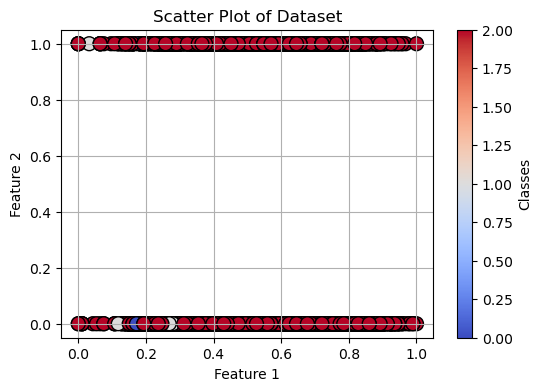

In [43]:
# X is feature matrix and y is your target variable
# X should be a 2D array where each row represents a data point and each column represents a feature


X = df.drop(['Classes'], axis=1)  # Features
y = df['Classes']                  # Target variable

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset')
plt.colorbar(label='Classes')
plt.grid(True)
plt.show()


### Over Sampling

In [44]:
sample = RandomOverSampler()
X_sampled,y_sampled  = sample.fit_resample(X,y)

### Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

### Choosing Best Classifier Model

#### Step 1: Define a list of classifier models

In [46]:
models = {
    "Logistic Regression" :LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gbm_classifier" : GradientBoostingClassifier(),
    "Adaboost_classifier" : AdaBoostClassifier(),
    "Xgboost_classifier" : xgb.XGBClassifier()
}

#### Step 2: Iterate over each model, train it, and evaluate its performance

In [47]:
import warnings
from sklearn.exceptions import ConvergenceWarning

best_model = None
best_accuracy = 0

for name, model in models.items():
    if isinstance(model, LogisticRegression):
        model.set_params(solver='saga', max_iter=1000)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Logistic Regression Accuracy: 0.94
KNN Accuracy: 0.99
SVM Accuracy: 0.94
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gbm_classifier Accuracy: 0.99
Adaboost_classifier Accuracy: 0.91
Xgboost_classifier Accuracy: 1.00


#### Step 3: Choose the best model based on the highest accuracy

In [ ]:
print(f"Best Model: {type(best_model).__name__} with Accuracy: {best_accuracy:.2f}")